# NLP: Sentiment Classification
### Classify the tweets by implementing any NLP approach for Sentiment analysis on the provided dataset. The objective is to recognize whether the given tweet is oriented as negative (-1), neutral (0), or positive (1) tone. Focus majorly on unique preprocessing techniques.

## NO. 1 
#### Importing the necessary librarie for the project and data

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
#Imprting the data
data = pd.read_csv("Twitter_Data.csv")

In [3]:
# Showing the top 5 rows
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
#Finding the count of the categories
data['category'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

In [5]:
#Finding the total rows and coluns in the dataframe using shape function
data.shape

(162980, 2)

In [6]:
#Replacing the dummy variables for the categories with the actual names of the categories
data['category']=data['category'].replace({-1.0:'negative',0.0:'neutral',1.0:'positive'})

In [7]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,negative
1,talk all the nonsense and continue all the dra...,neutral
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive


#### Checking if there are missing values and droping them

In [8]:
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [9]:
#Dropping the missing data 
data.dropna(inplace=True)

In [10]:
#Checking if the missing variables have been dropped
data.isnull().sum()

clean_text    0
category      0
dtype: int64

In [11]:
data.shape

(162969, 2)

# NO.2 
## Exploratory analysis

Text(0.5, 1.0, 'Distribution of the categories')

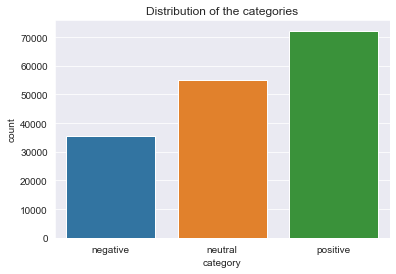

In [12]:
#Distribution of the variables in the category column
sns.countplot(data['category'])
plt.title("Distribution of the categories")

#### From the above we notice graph, we notice that **Positive** category as the highest number followed by **neutral** category and lastly the **negative** category.
#### Also we notice that distribution of the categories is imbalanced

In [13]:
#Checking which text has the highest number of characters
data['Length'] = data['clean_text'].apply(len)
data.head()

,clean_text,category,Length
0,when modi promised “minimum government maximum...,negative,210
1,talk all the nonsense and continue all the dra...,neutral,68
2,what did just say vote for modi welcome bjp t...,positive,117
3,asking his supporters prefix chowkidar their n...,positive,212
4,answer who among these the most powerful world...,positive,81


Text(0.5, 1.0, 'Distribution')

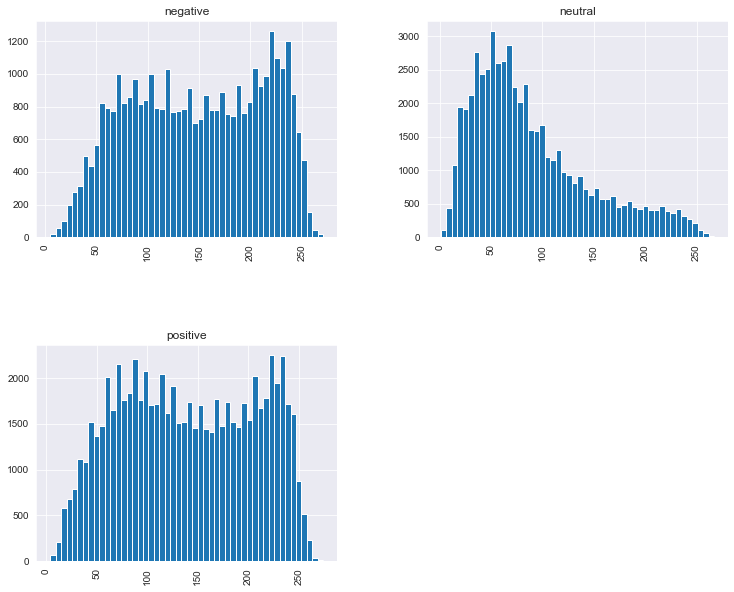

In [14]:
#Displaying the category with the highest number of character
data.hist(column='Length', by='category', bins=50,figsize=(12,10))
plt.title("Distribution")

# NO.3
## Preprocessing the data

In [15]:
#Importing the libraried for Natural language processing
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Removing the quotes on the data and the turning the texts into lower case for easy preprocessing

In [16]:
#Removing the quotation marks from the text (Some of the text have quotation marks)
data['clean_text'] = data['clean_text'].replace('“', '').replace('”', '').replace("'", '').replace('’', '')
#Converting the clean_text to lower case
data['lower_text']=data['clean_text'].apply(lambda x: x.lower())


In [17]:
data.head()

,clean_text,category,Length,lower_text
0,when modi promised “minimum government maximum...,negative,210,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,neutral,68,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,positive,117,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,positive,212,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,positive,81,answer who among these the most powerful world...


##### Function for removing the punctuation marks on the texts, stop words and lemmatizing the data
#####  Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language. 

In [18]:
#removing punctuation marks and stop words from the posts
from nltk.corpus import stopwords

def data_preprocessing(posts):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
   #Tokenizing the words 
    tokenized_word=word_tokenize(posts)
    # Check characters to see if they are in punctuation
    nopunc = [char for char in tokenized_word if char not in string.punctuation]

    # Join the characters again to form the string.
    #nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    nostop=[word for word in nopunc if word not in stopwords.words('english')]
    
    #lemmatization
    lem = WordNetLemmatizer()
    return [lem.lemmatize(word) for word in nostop]



# NO.4
## Training the model

In [19]:
#Splitting  the data to training and testing
from sklearn.model_selection import train_test_split
post_train,post_test,y_train,y_test = train_test_split(data['lower_text'],data['category'],test_size=0.3,random_state=123)

In [20]:
post_train.shape,post_test.shape,y_train.shape,y_test.shape

((114078,), (48891,), (114078,), (48891,))

#### Importing necessary libraries for processing the data into vectors and finding the TF-IDF features for the data
#### **CountVectorizer** -  Used to count the number of words (term frequency), limit your vocabulary size, apply stop words and etc
####  **TfidfTransformer** - finds the TF-IDF features for the data
####  **Pipeline** - Creates a single function(pipeline) for performing the above tasks at once when you pass in the data.

In [21]:
# Importing the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline


In [22]:
#Import the classification model for the data
from sklearn.naive_bayes import MultinomialNB

In [23]:
# Pipeline for passing data
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=data_preprocessing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [24]:
# Training the model by passing the data through the pipelne function
pipeline.fit(post_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function data_preprocessing at 0x0000022E99CD0708>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [25]:
# using the model to predict the testing data
predictions = pipeline.predict(post_test)

#### Measuring the performance of the model

In [26]:
# Importing the necessary Libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.94      0.11      0.19     10821
     neutral       0.88      0.33      0.48     16503
    positive       0.51      0.98      0.67     21567

    accuracy                           0.57     48891
   macro avg       0.78      0.47      0.45     48891
weighted avg       0.73      0.57      0.50     48891

0.5665050827350637


In [27]:
#Importing random forest model
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Pipeline for passing data
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=data_preprocessing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [29]:
# Training the model by passing the data through the pipelne function
pipeline.fit(post_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function data_preprocessing at 0x0000022E99CD0708>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [30]:
# using the model to predict the testing data
predictions = pipeline.predict(post_test)


In [31]:
# Importing the necessary Libraries 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.89      0.57      0.69     10821
     neutral       0.83      0.91      0.87     16503
    positive       0.81      0.90      0.85     21567

    accuracy                           0.83     48891
   macro avg       0.84      0.79      0.80     48891
weighted avg       0.83      0.83      0.82     48891

0.8268392955758729


# No. 5
### Conclusion

#### Since the data is not balanced, we are going to use f1 score to evaluate the model performamce instead of accuracy.
#### We notice from the two models used, RandomForestClassifier has the highest score thus the best model to classfy the sentiments